In [67]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



full_data = pd.read_csv('/kaggle/input/d/vikassssssss/titanic-dataset/titanic_data.csv')

display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
outcomes = full_data['Survived']
data = full_data

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
def accuracy_score(truth, pred):
        if len(truth) == len(pred):
            return "Predictions have an accuracy of {:.2f}%.".format((truth==pred).mean()*100)
        else:
            return "Number of Predictions does not match a number of outcomes!"

predictions = pd.Series(np.ones(5,dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


In [63]:
def predictions_0(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_0(data)

In [65]:

print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


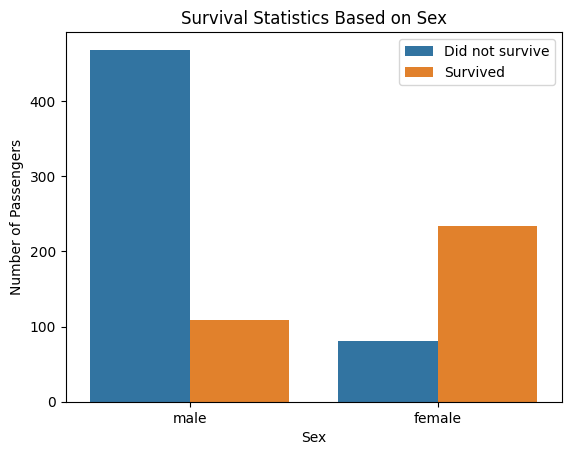

In [68]:

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Statistics Based on Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()

In [80]:
def predictions_1(data):
    predictions = []
    for _,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)
predictions = predictions_1(data)


In [81]:
print(accuracy_score(outcomes, predictions))


Predictions have an accuracy of 78.68%.


In [73]:
male_passengers = data[data['Sex'] == 'male']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


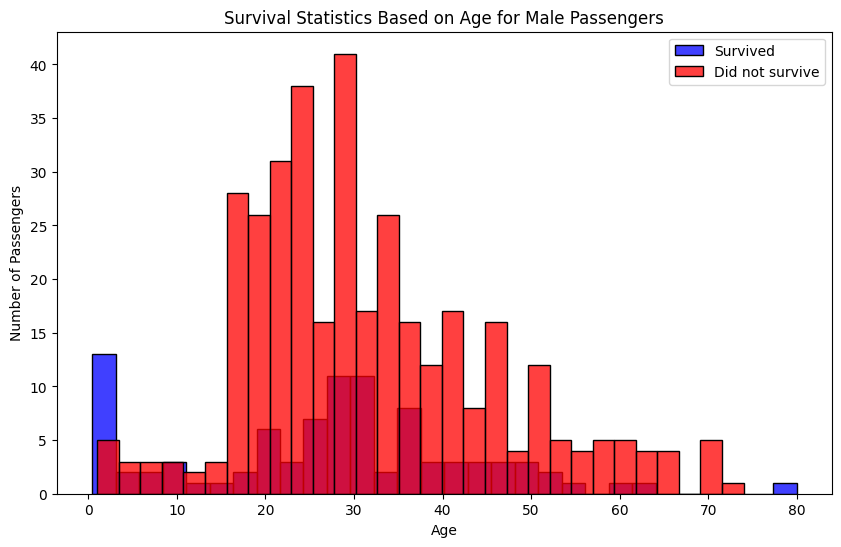

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(male_passengers[male_passengers['Survived'] == 1]['Age'].dropna(), bins=30, color='blue', label='Survived', kde=False)
sns.histplot(male_passengers[male_passengers['Survived'] == 0]['Age'].dropna(), bins=30, color='red', label='Did not survive', kde=False)
plt.title('Survival Statistics Based on Age for Male Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [76]:
female_passengers = data[data['Sex'] == 'female']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


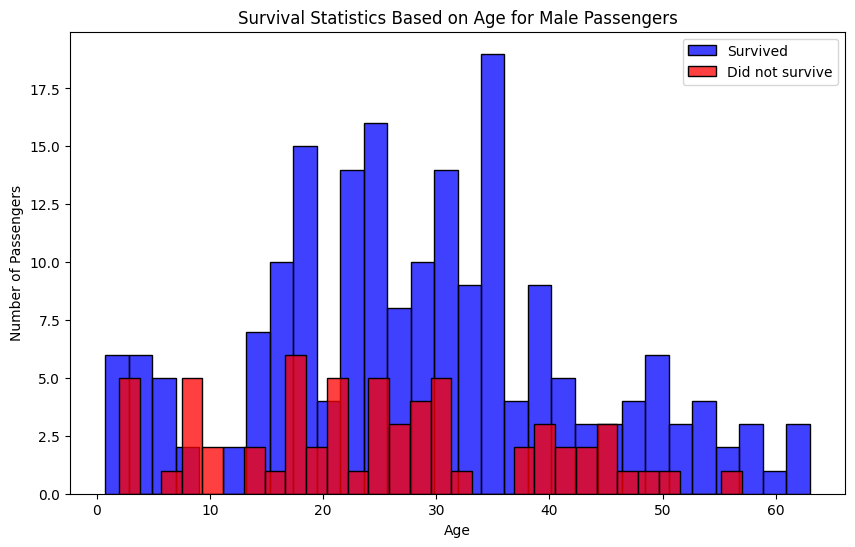

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(female_passengers[female_passengers['Survived'] == 1]['Age'].dropna(), bins=30, color='blue', label='Survived', kde=False)
sns.histplot(female_passengers[female_passengers['Survived'] == 0]['Age'].dropna(), bins=30, color='red', label='Did not survive', kde=False)
plt.title('Survival Statistics Based on Age for Male Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [85]:
def predictions_2(data):
    predictions = []
    for _,passenger in data.iterrows():
        if passenger['Sex'] == 'female' :
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age']<10:
            predictions.append(1)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)
predictions = predictions_2(data)


In [86]:
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 79.35%.


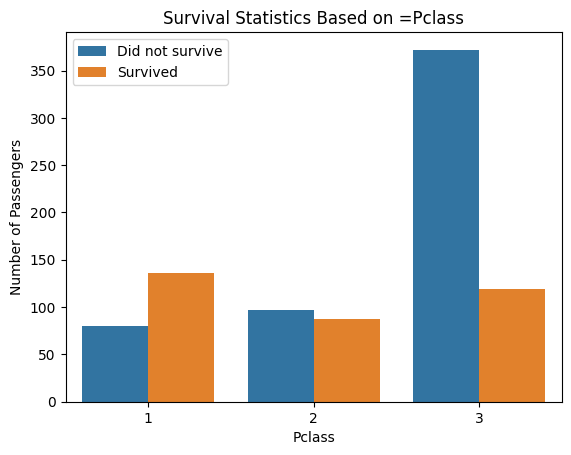

In [87]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Statistics Based on =Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()

In [ ]:
def predictions_3(data):
    predictions = []
    for _,passenger in data.iterrows():
        if passenger['Sex'] == 'female' :
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age']<10:
            predictions.append(1)
        elif passenger['Pclass'] == 3:
            predictions.append(0)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)
predictions = predictions_3(data)

In [88]:
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 79.35%.


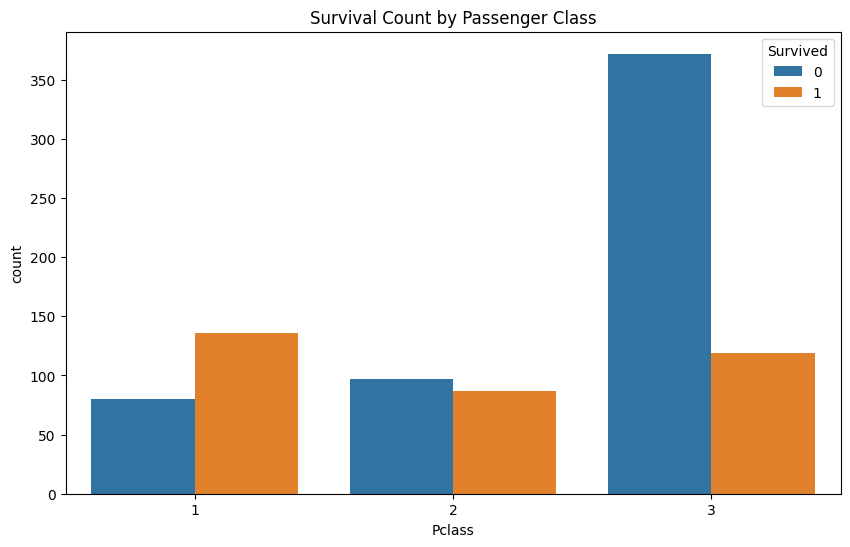

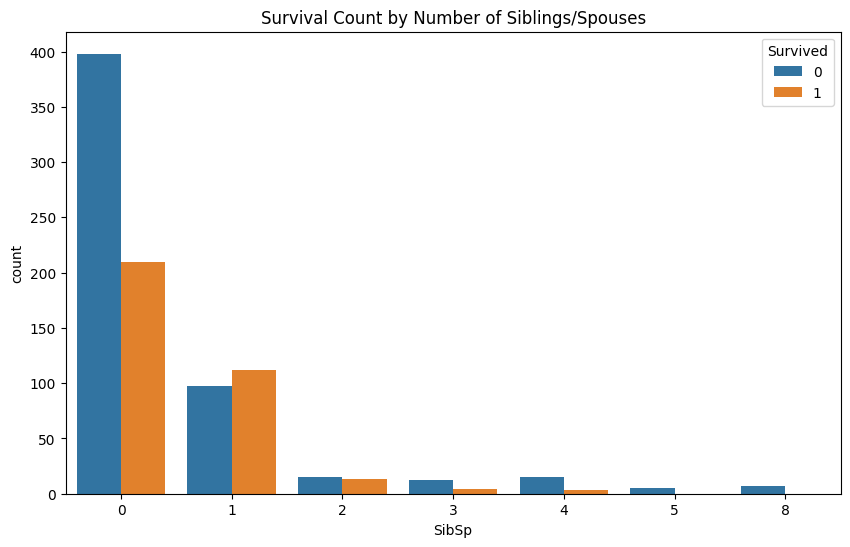

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=data)
plt.title('Survival Count by Number of Siblings/Spouses')
plt.show()

In [99]:
def predictions_4(data):
    predictions = []
    for _,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            if passenger['Pclass'] == 3 and passenger['Age'] > 40:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passenger['Pclass'] == 1 and passenger['Age'] < 18:
                predictions.append(1)
            elif passenger['Pclass'] == 2 and passenger['Age'] < 18:
                predictions.append(1)
            elif passenger['SibSp'] == 0 and passenger['Parch'] == 0 and passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
                
    return pd.Series(predictions)
                
predictions = predictions_4(data)

In [100]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.70%.


This is the final prediction made on titanic dataset with an accuracy score of 80.70%